# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [77]:
!pip install plotnine

Defaulting to user installation because normal site-packages is not writeable


Running this project require the following imports 

In [78]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.mixture import GaussianMixture

%matplotlib inline

In [79]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = ['Red', 'Blue', 'Green', 'Yellow', 'Purple', 'Orange', 'Pink', 'Brown', 'White', 'Gray', 'Cyan', 'Magenta', 'Turquoise', 'Olive', 'Maroon', 'Navy', 'Teal', 'Lavender', 'Salmon', 'Gold', 'Silver', 'Lime', 'Tan', 'Beige', 'Indigo', 'Violet', 'Crimson', 'Fuchsia', 'Black']
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i%len(color)],alpha = alpha,s=s)
#             plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



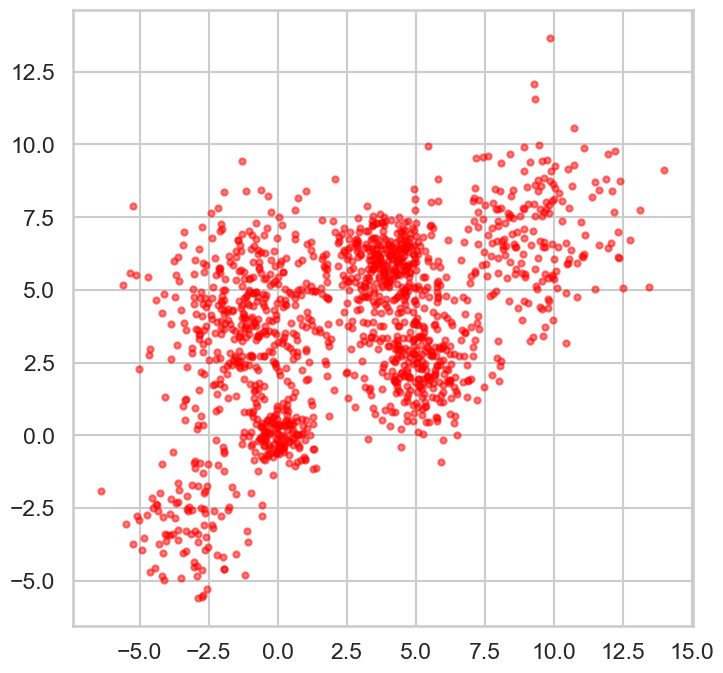

In [80]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [81]:
df_copy = np.array(None)

def kmeans(data,n_clusters):

        global df_copy 
        df_copy= data.copy()
        # create an instance of the KMeans class
        kmeans = KMeans(n_clusters)

        # fit the model to the data
        kmeans.fit(data)

        # get the labels of the clusters
        labels = kmeans.labels_

        # get the centroids of the clusters
        centroids = kmeans.cluster_centers_
        
        return kmeans

KMeans(n_clusters=1)
KMeans(n_clusters=2)
KMeans(n_clusters=3)
KMeans(n_clusters=4)
KMeans(n_clusters=5)
KMeans(n_clusters=6)
KMeans(n_clusters=7)
KMeans()


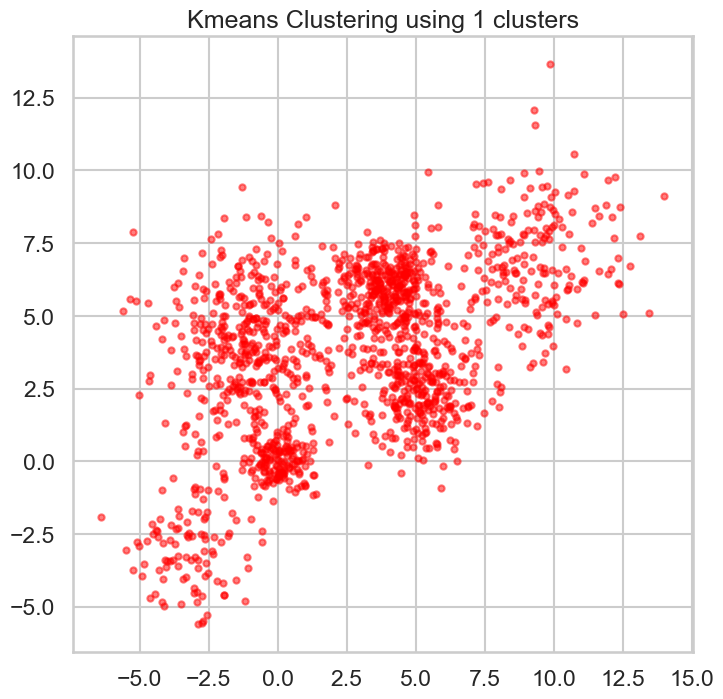

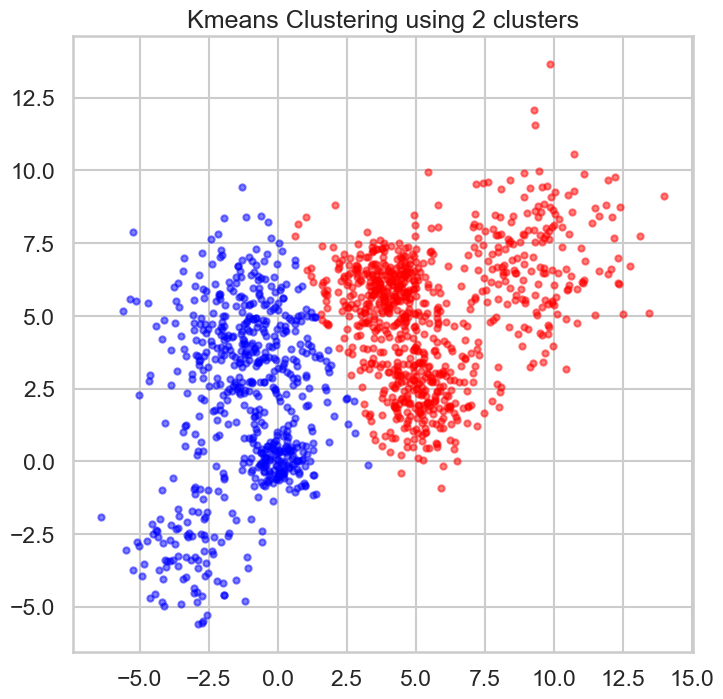

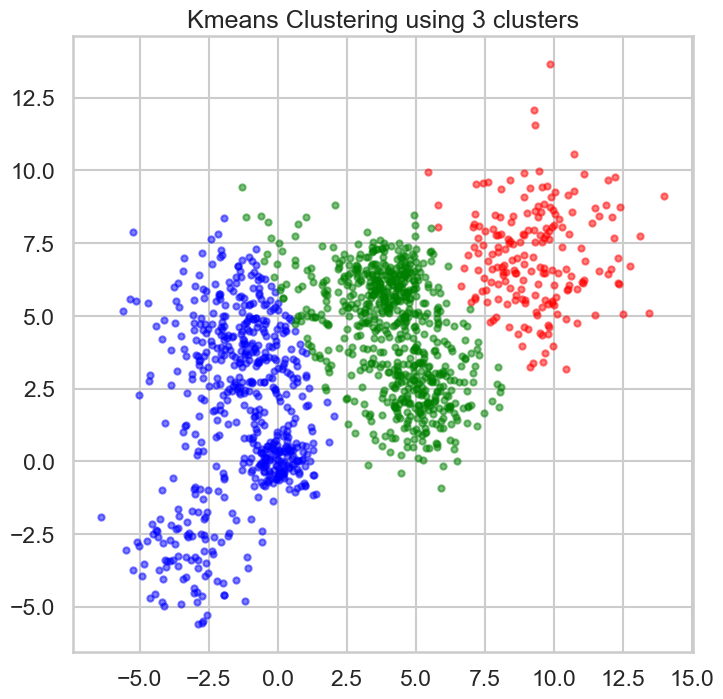

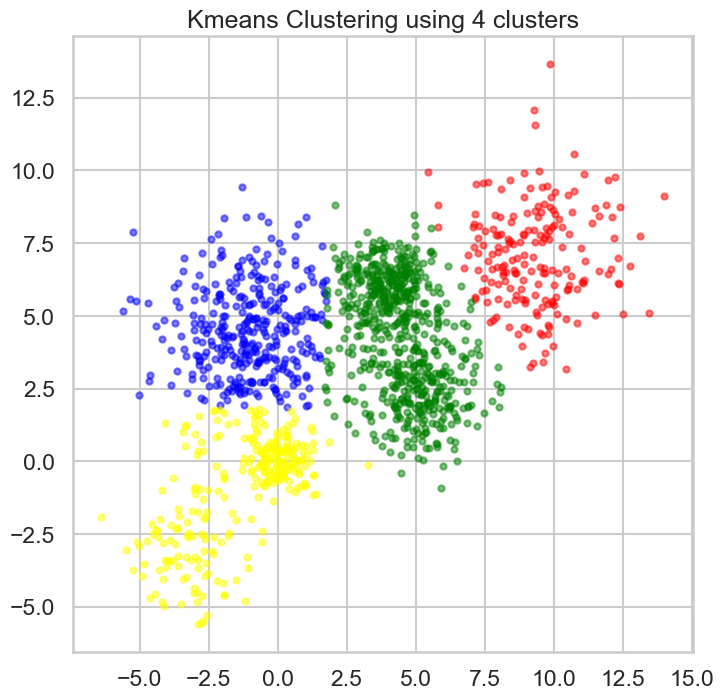

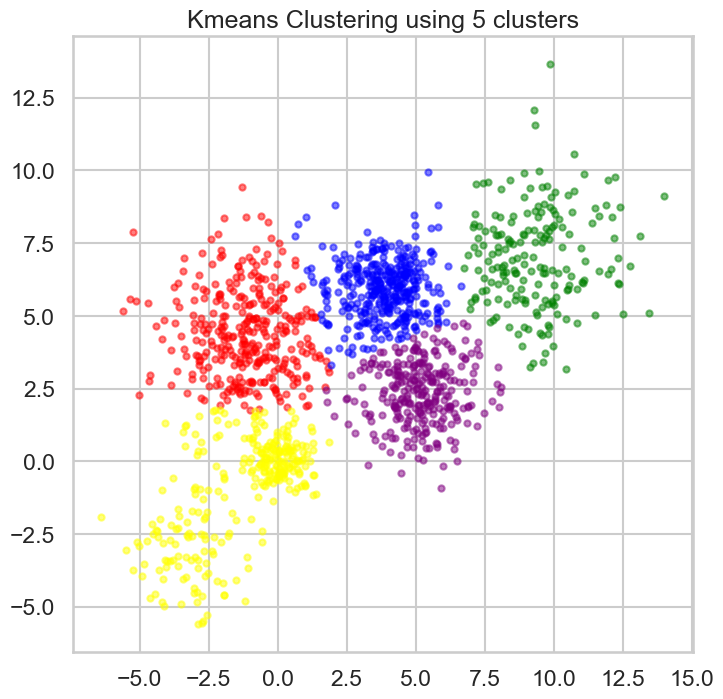

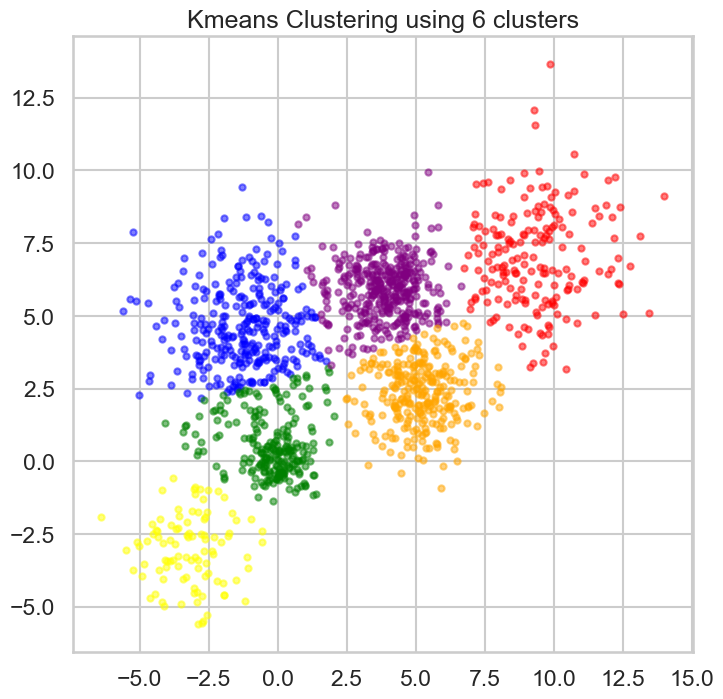

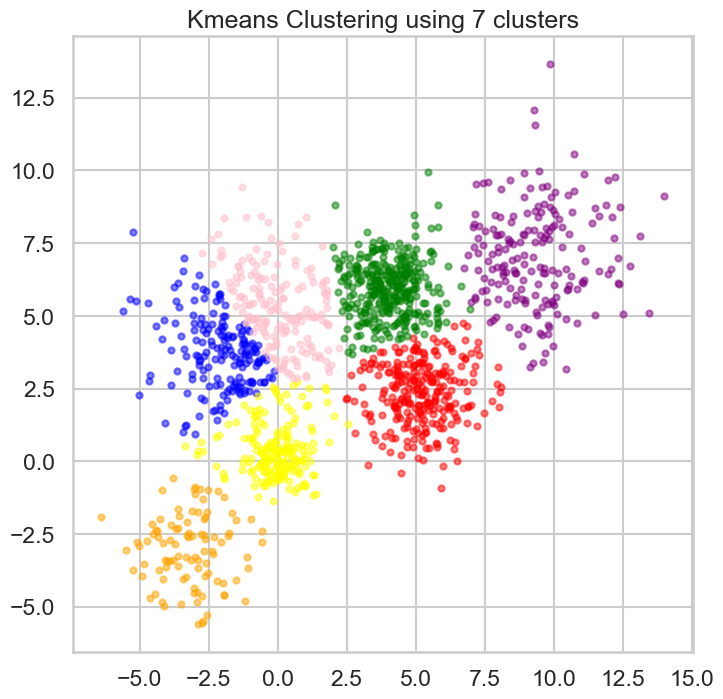

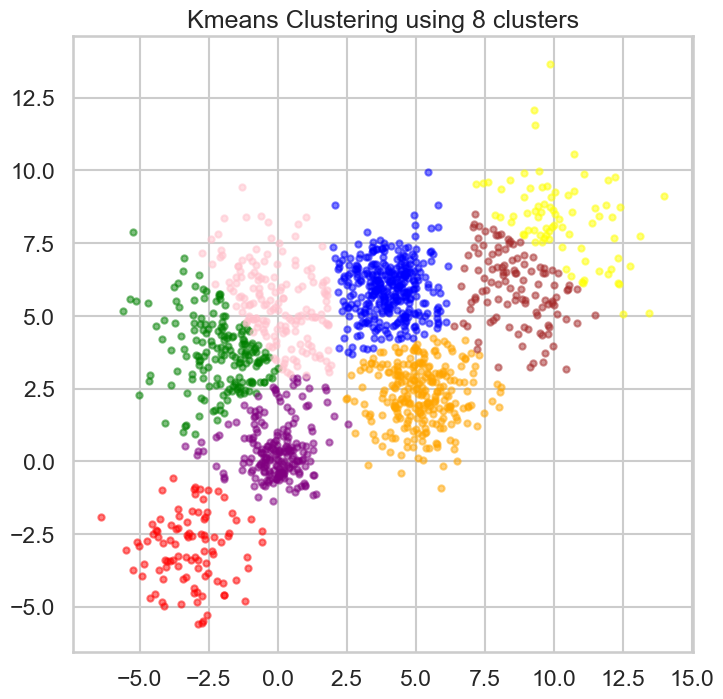

In [82]:
Kmeans_output = []

for i in range(8):
    km = kmeans(pd.DataFrame(Multi_blob_Data), i+1)
    
    print(km)

    plt.figure()
    plt.title(f'Kmeans Clustering using {i+1} clusters')
    display_cluster(df_copy.to_numpy(copy=True), km, i+1)
    
    Kmeans_output.append(km)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [83]:
df = pd.DataFrame(Multi_blob_Data).copy()
print(df[0][0])
# display_cluster(X.to_numpy(copy=True), X,model.n_clusters_)


def agg_clus(data,num_clusters = None, affinity='euclidean', linkage_type='average', distance_threshold=1.0):
    df_copy = data.copy()
    model = AgglomerativeClustering(n_clusters=num_clusters, affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold)
    model.fit(data)
    
    return model

-2.3542716010853972


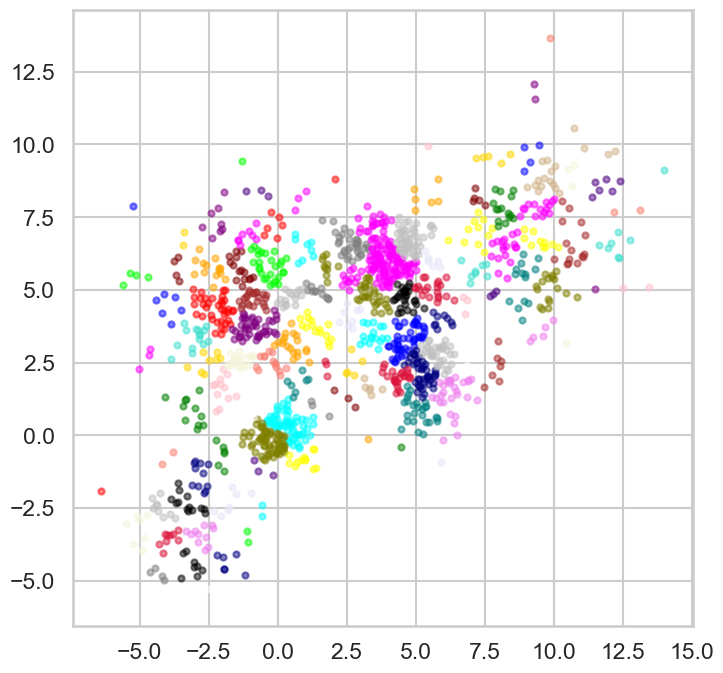

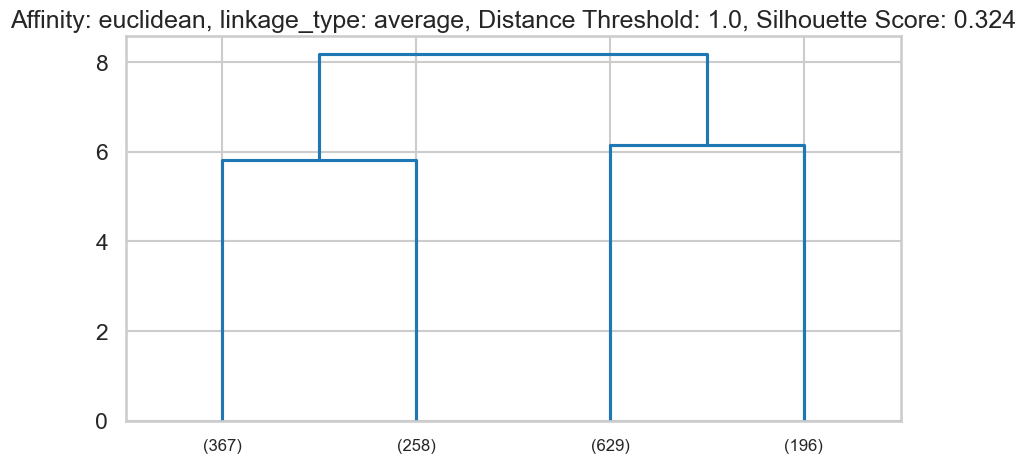

Affinity: euclidean, linkage_type: average, Distance Threshold: 1.0, Silhouette Score: 0.324
[112  89 112 ...  76  93  31]


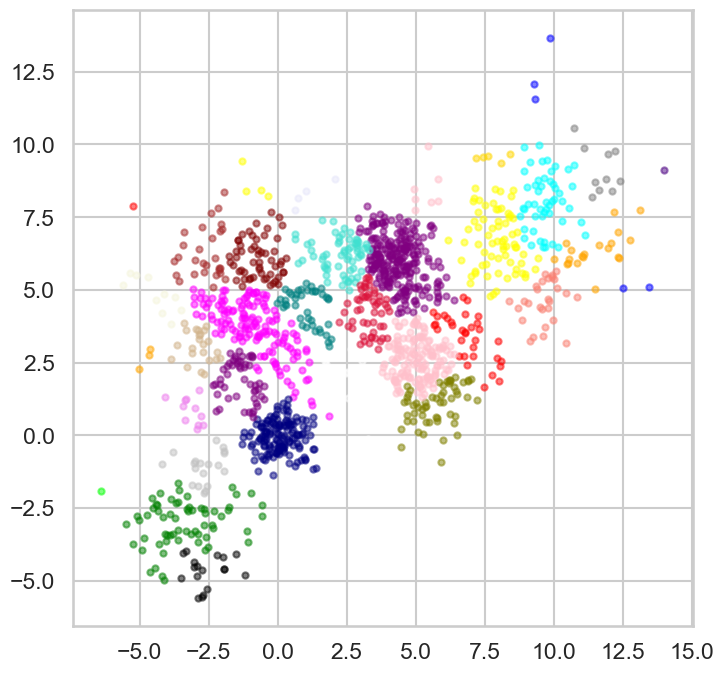

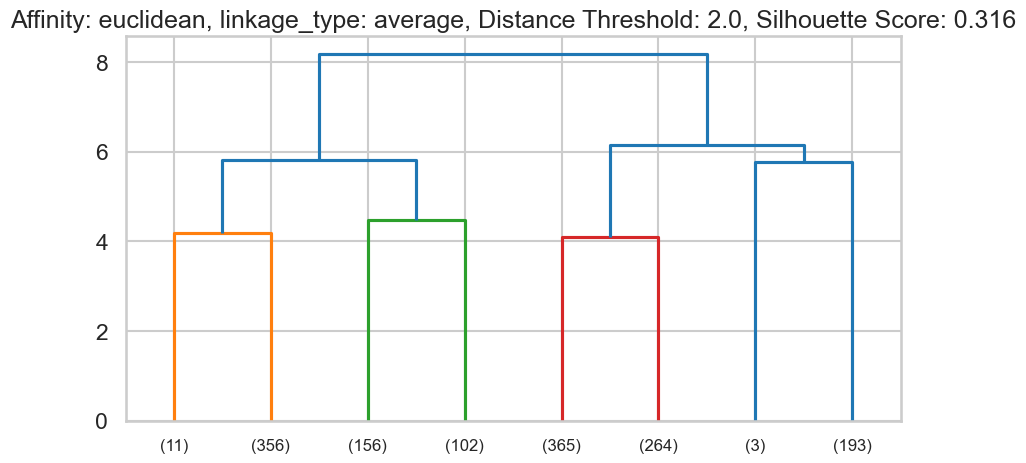

Affinity: euclidean, linkage_type: average, Distance Threshold: 2.0, Silhouette Score: 0.316
[ 2 20  2 ...  1  6  3]


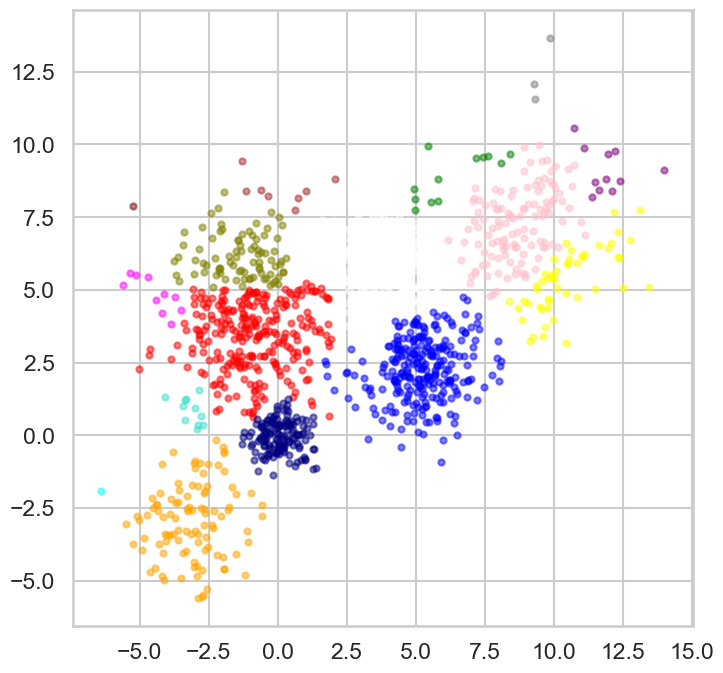

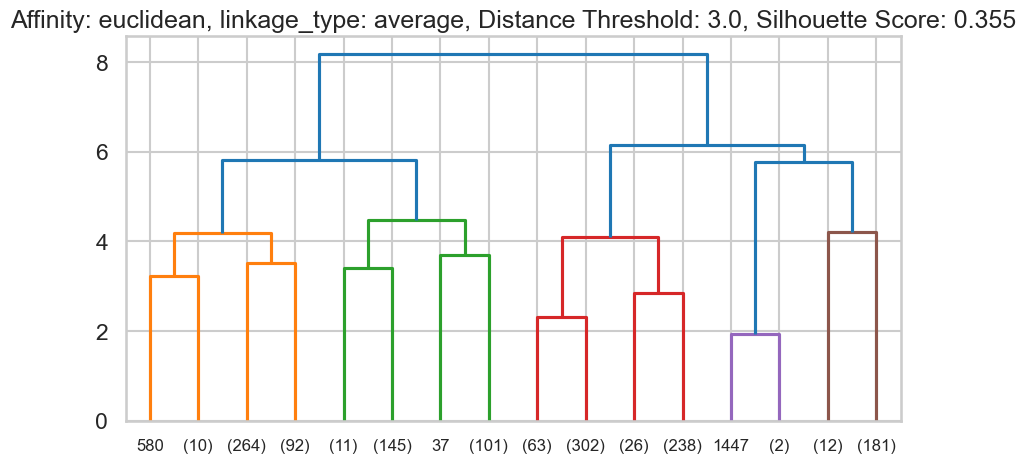

Affinity: euclidean, linkage_type: average, Distance Threshold: 3.0, Silhouette Score: 0.355
[5 5 5 ... 9 2 6]


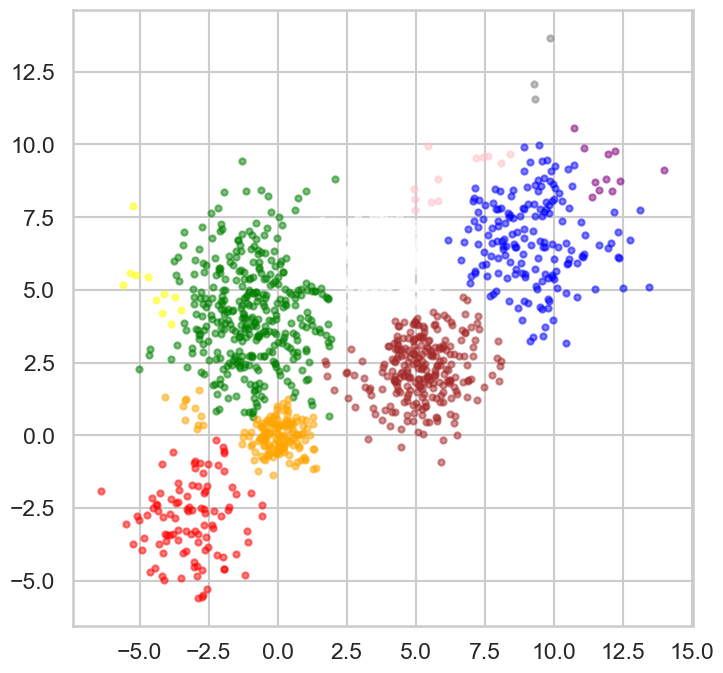

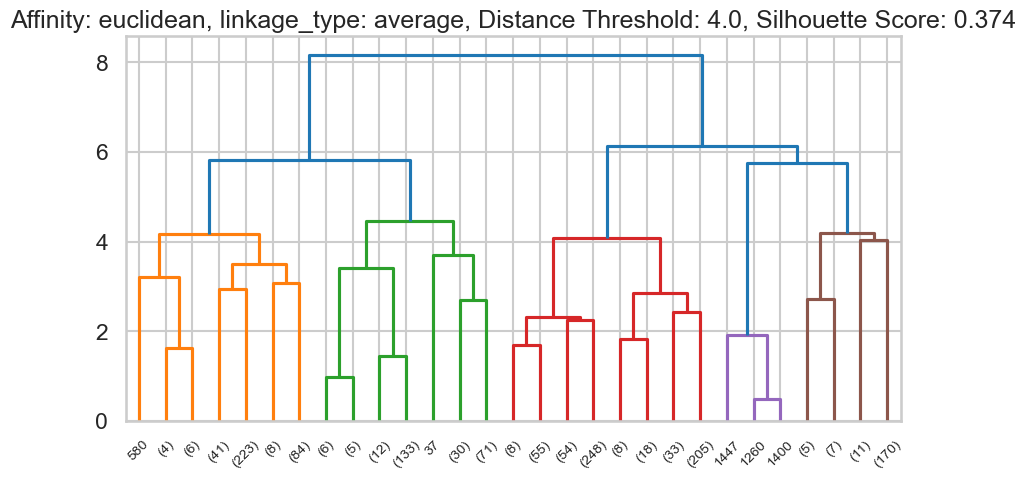

Affinity: euclidean, linkage_type: average, Distance Threshold: 4.0, Silhouette Score: 0.374
[0 0 0 ... 9 6 1]


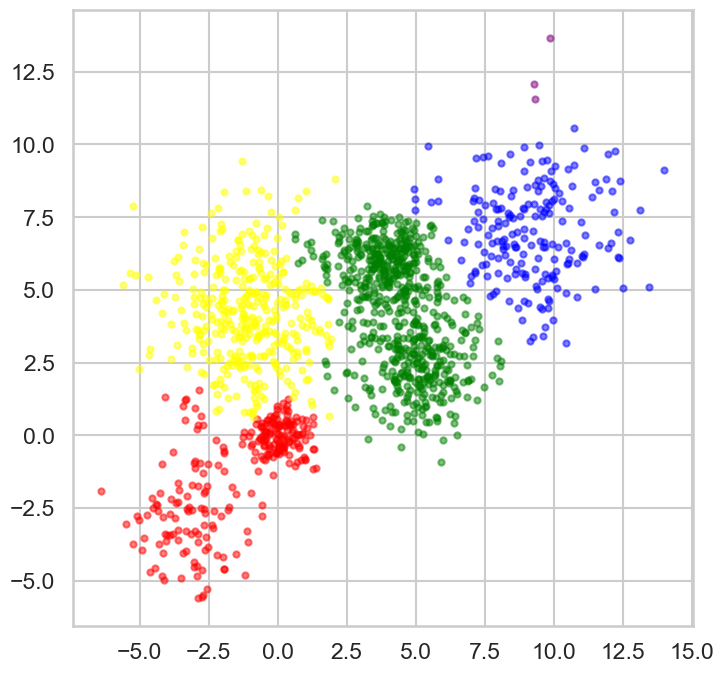

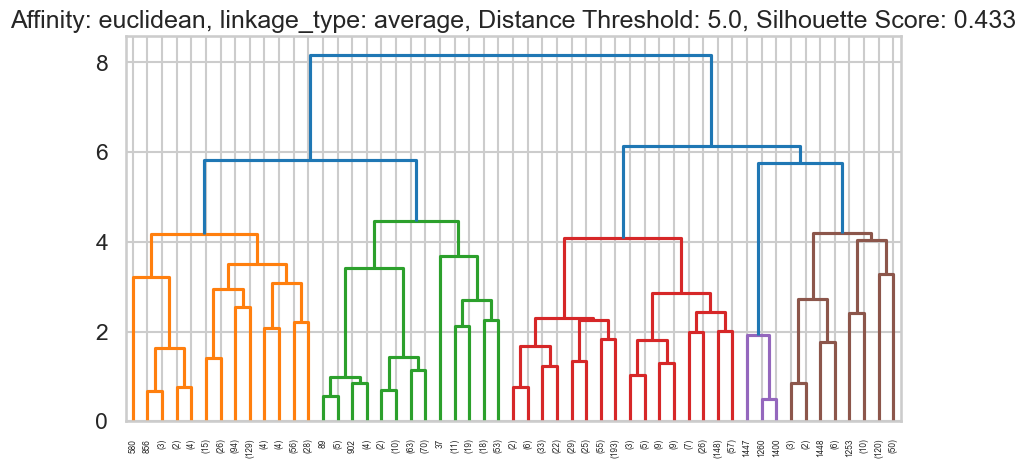

Affinity: euclidean, linkage_type: average, Distance Threshold: 5.0, Silhouette Score: 0.433
[0 0 0 ... 4 1 1]


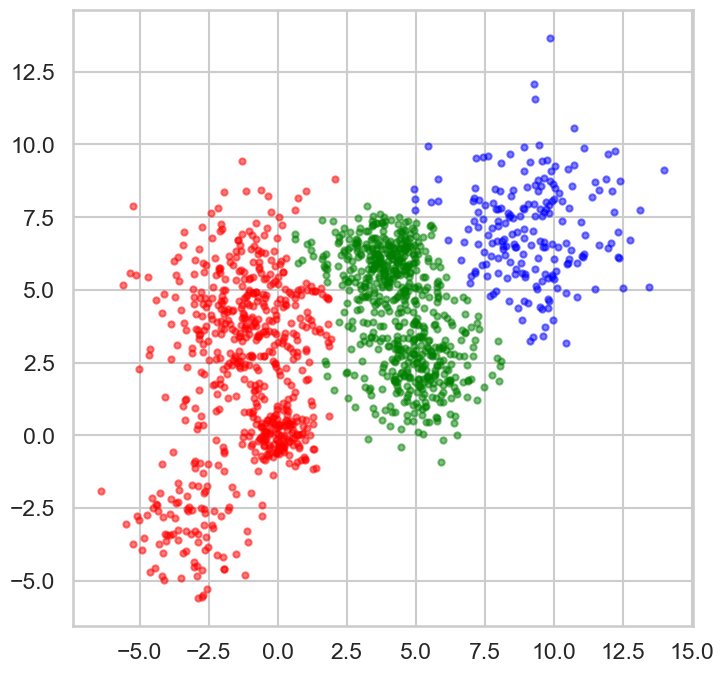

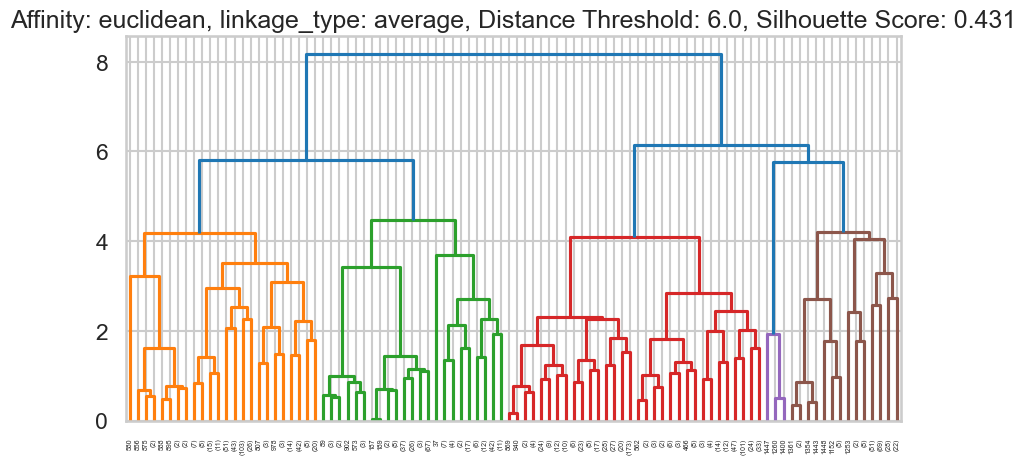

Affinity: euclidean, linkage_type: average, Distance Threshold: 6.0, Silhouette Score: 0.431
[0 0 0 ... 1 1 1]


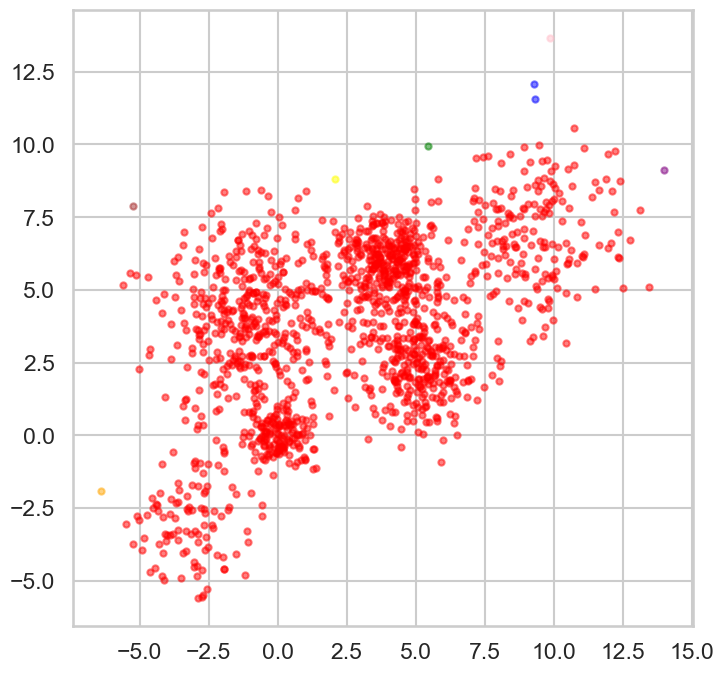

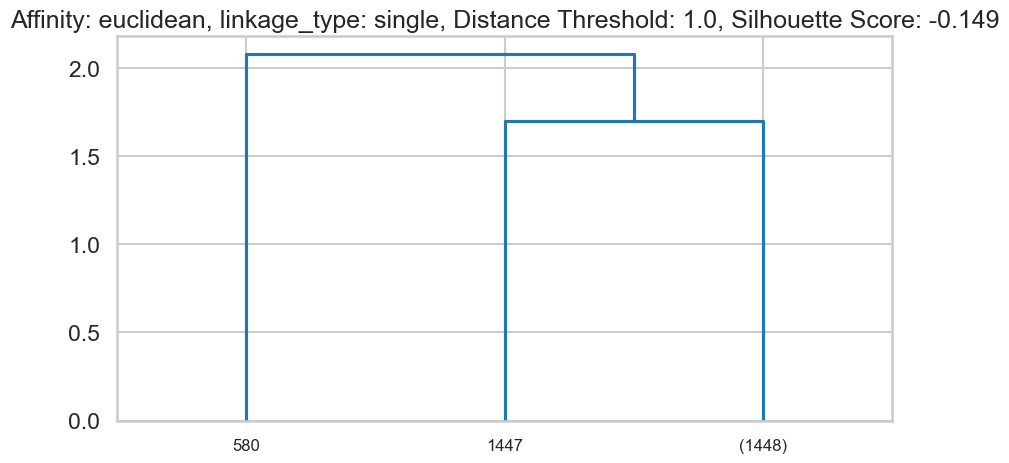

Affinity: euclidean, linkage_type: single, Distance Threshold: 1.0, Silhouette Score: -0.149
[0 0 0 ... 6 2 0]


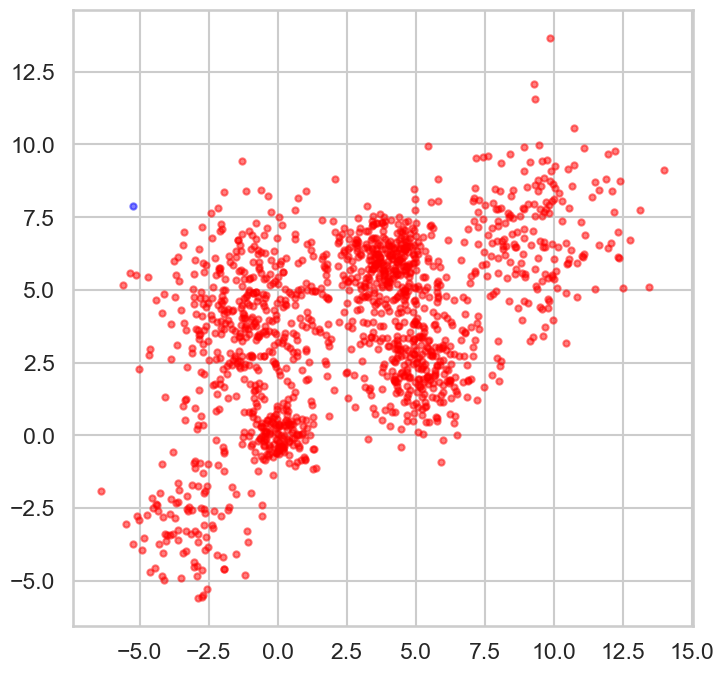

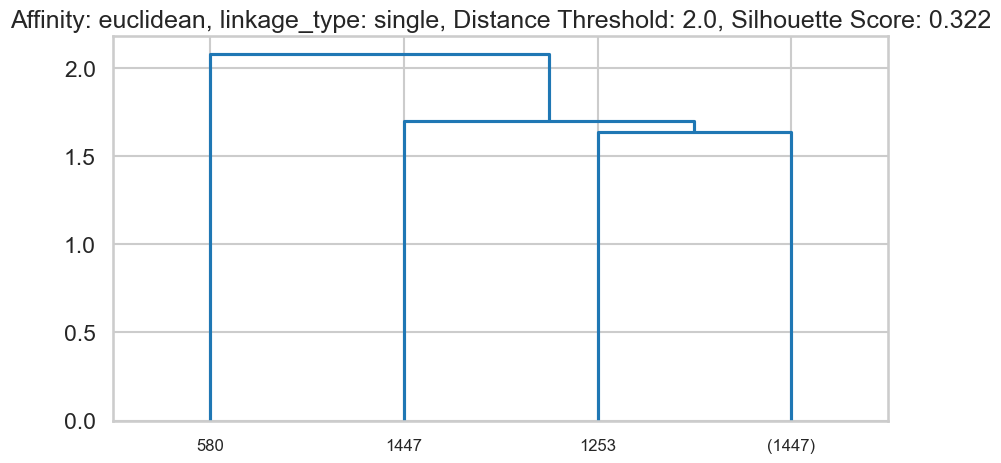

Affinity: euclidean, linkage_type: single, Distance Threshold: 2.0, Silhouette Score: 0.322
[0 0 0 ... 0 0 0]
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


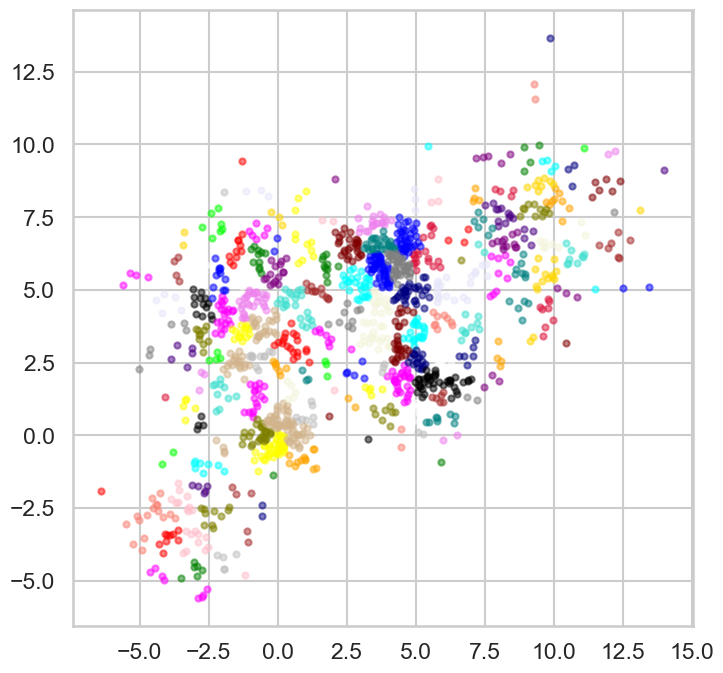

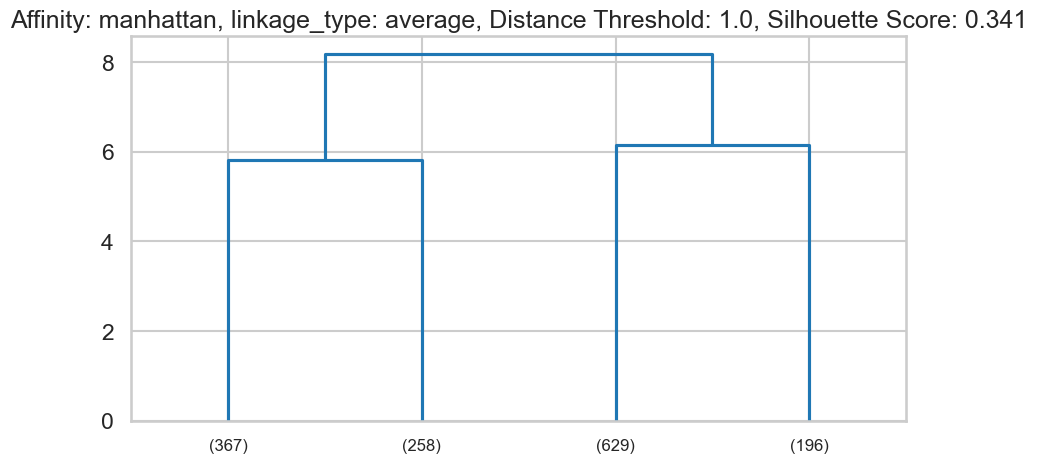

Affinity: manhattan, linkage_type: average, Distance Threshold: 1.0, Silhouette Score: 0.341
[ 13  39   6 ... 160  97  24]


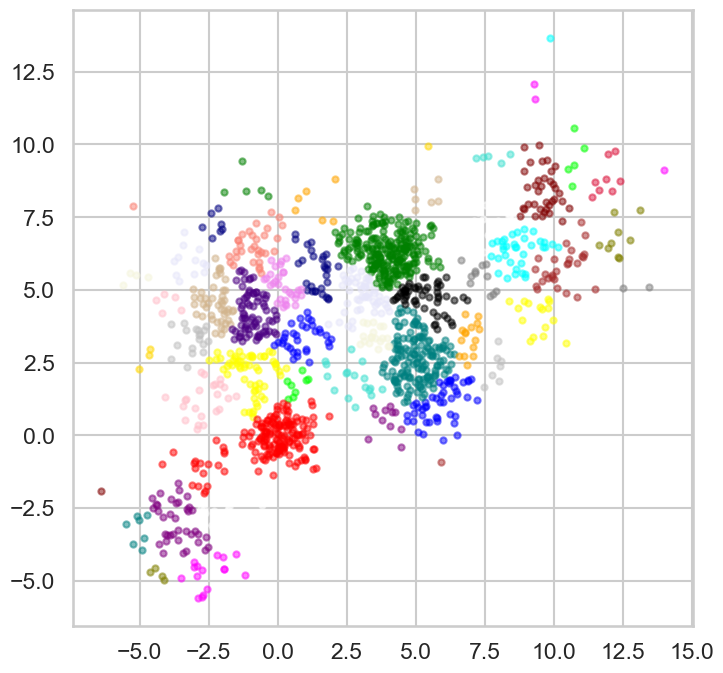

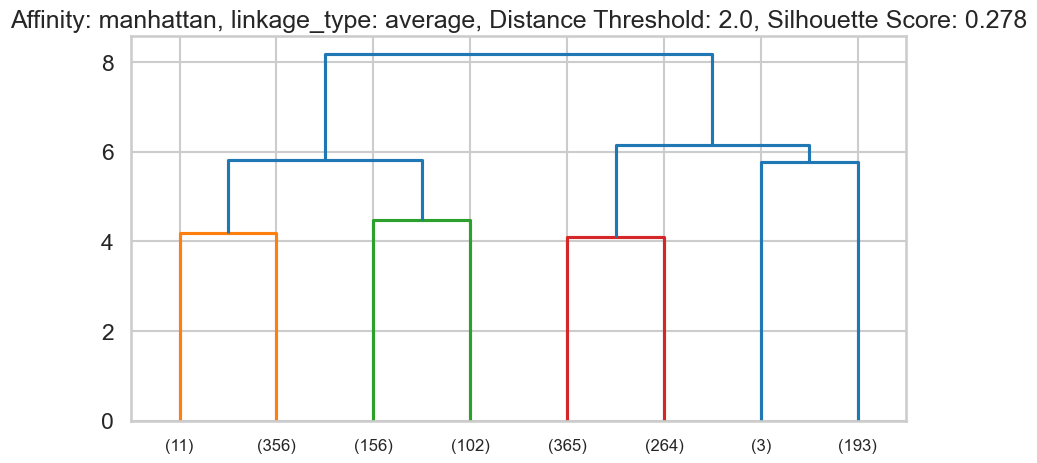

Affinity: manhattan, linkage_type: average, Distance Threshold: 2.0, Silhouette Score: 0.278
[ 8  0  4 ... 39 48 37]


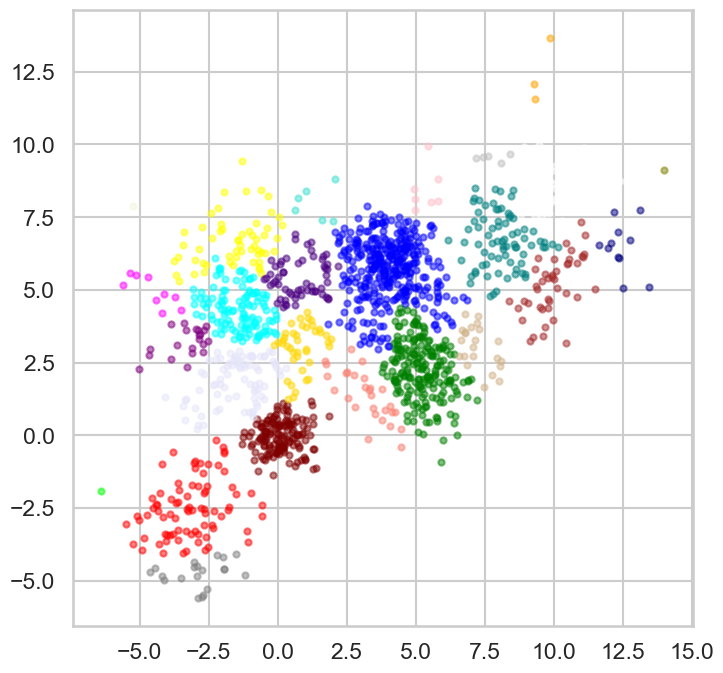

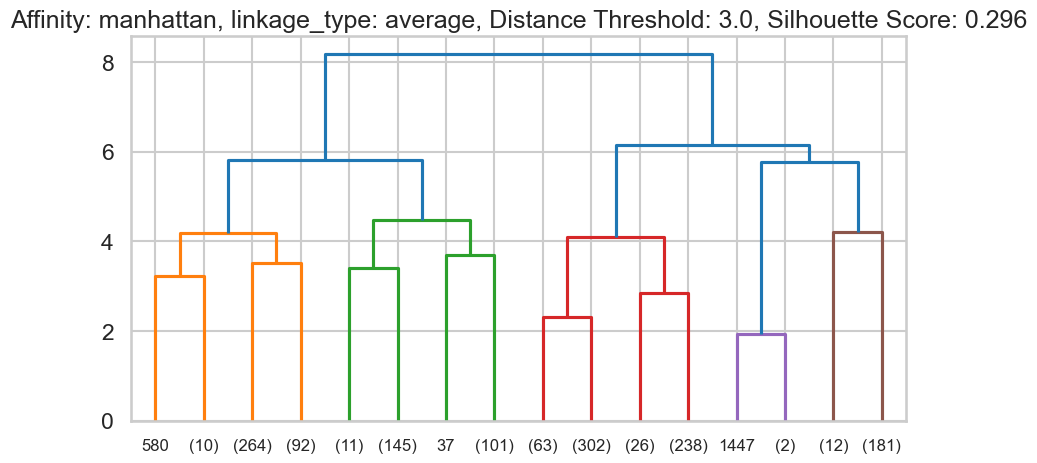

Affinity: manhattan, linkage_type: average, Distance Threshold: 3.0, Silhouette Score: 0.296
[ 0  0  0 ...  5  6 16]


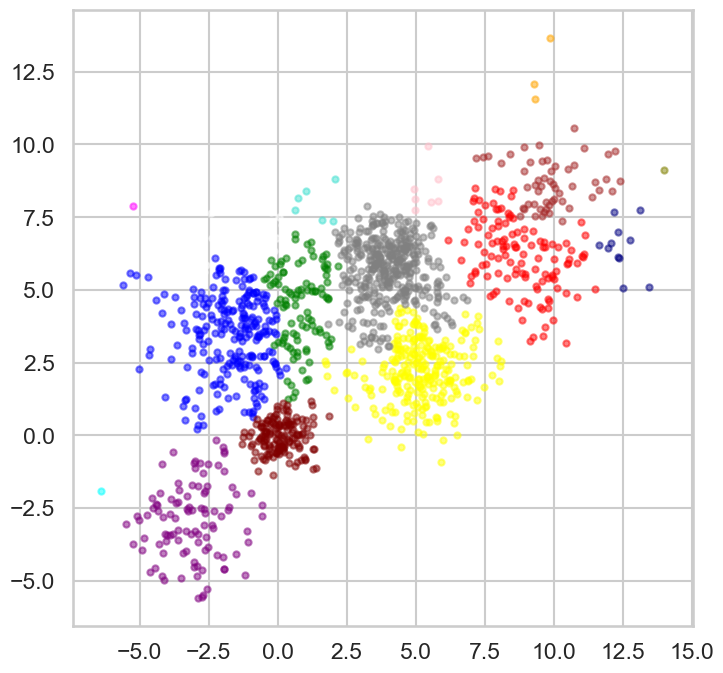

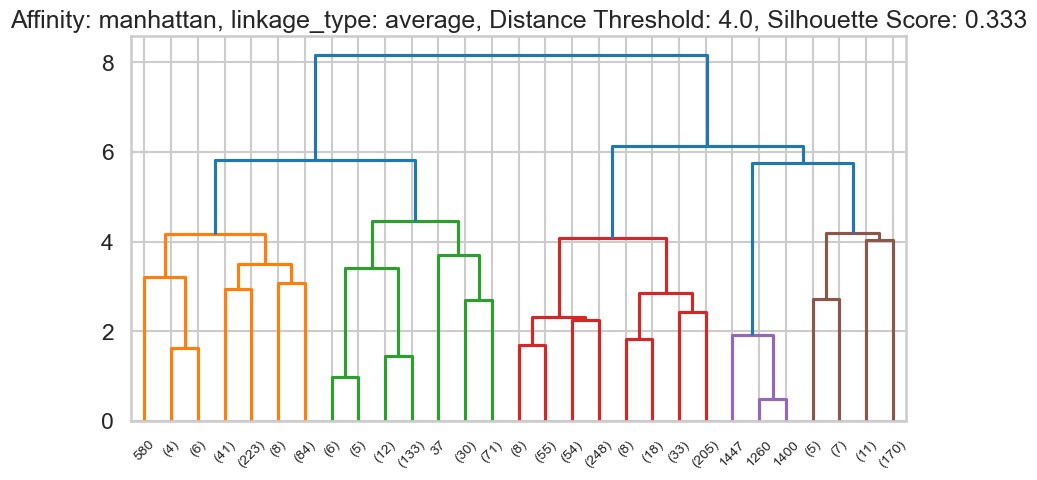

Affinity: manhattan, linkage_type: average, Distance Threshold: 4.0, Silhouette Score: 0.333
[4 4 4 ... 5 6 0]


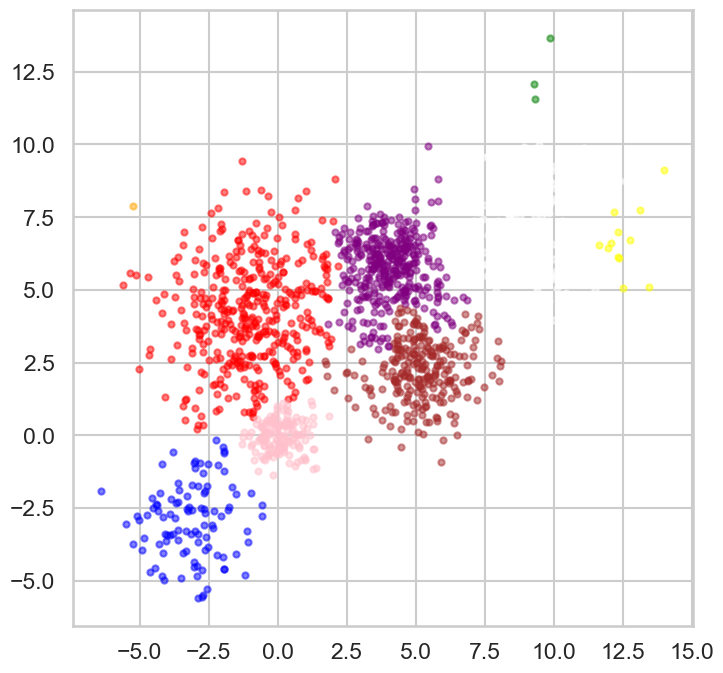

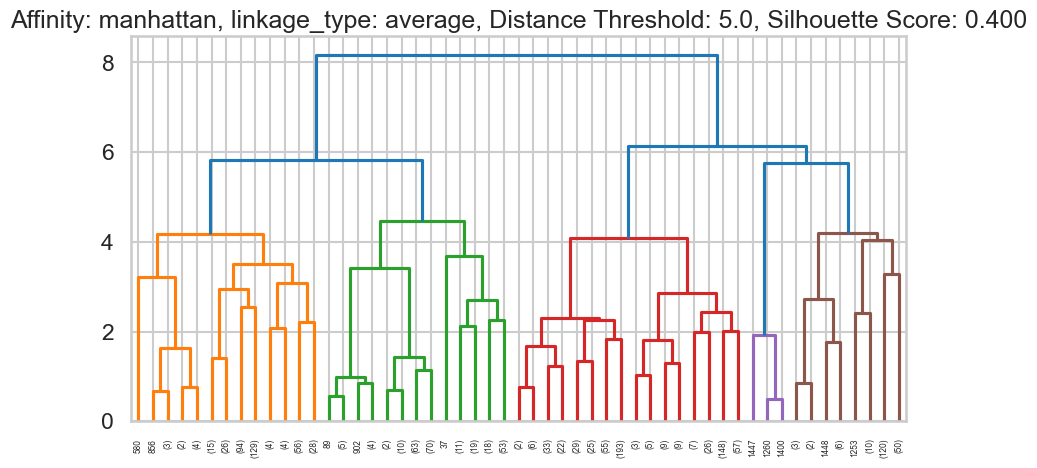

Affinity: manhattan, linkage_type: average, Distance Threshold: 5.0, Silhouette Score: 0.400
[1 1 1 ... 2 4 8]


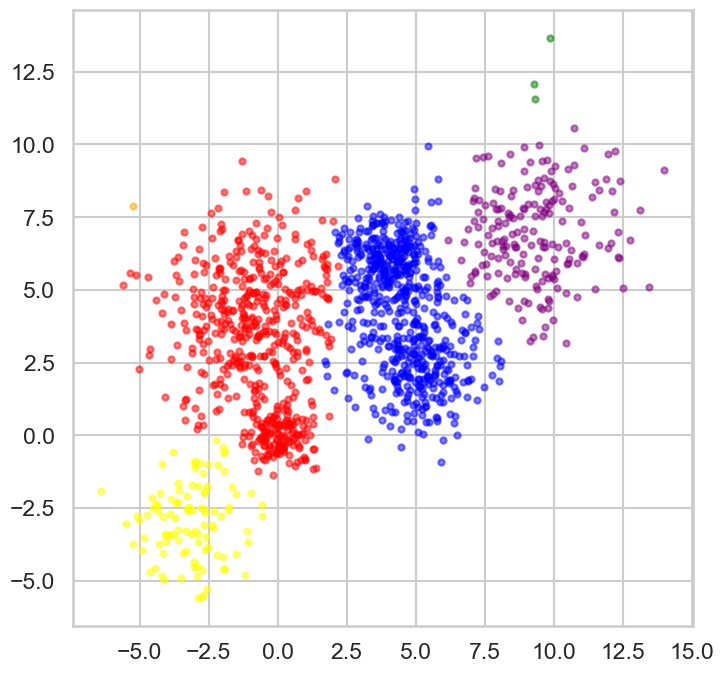

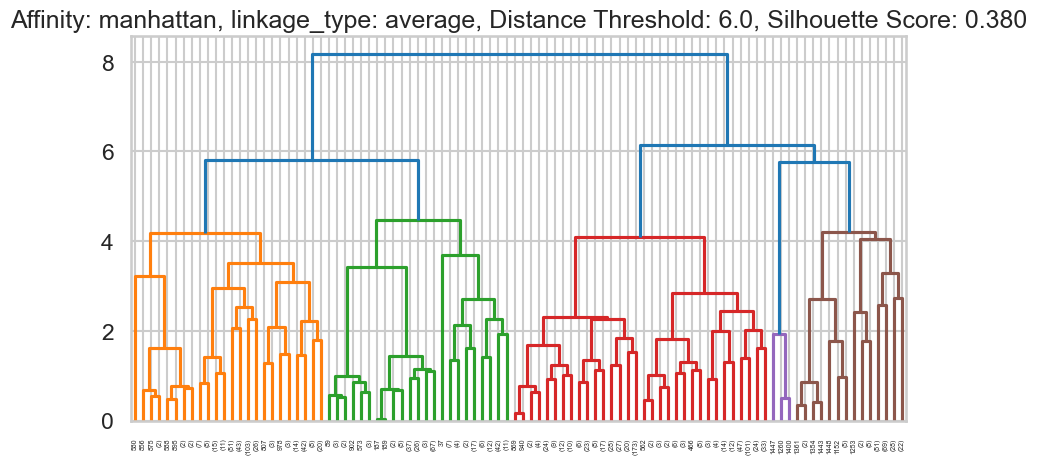

Affinity: manhattan, linkage_type: average, Distance Threshold: 6.0, Silhouette Score: 0.380
[3 3 3 ... 2 1 4]


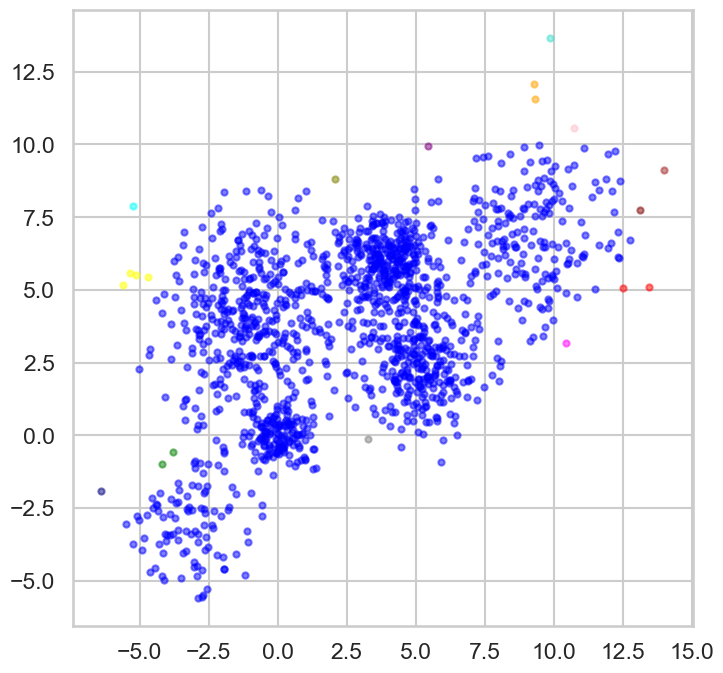

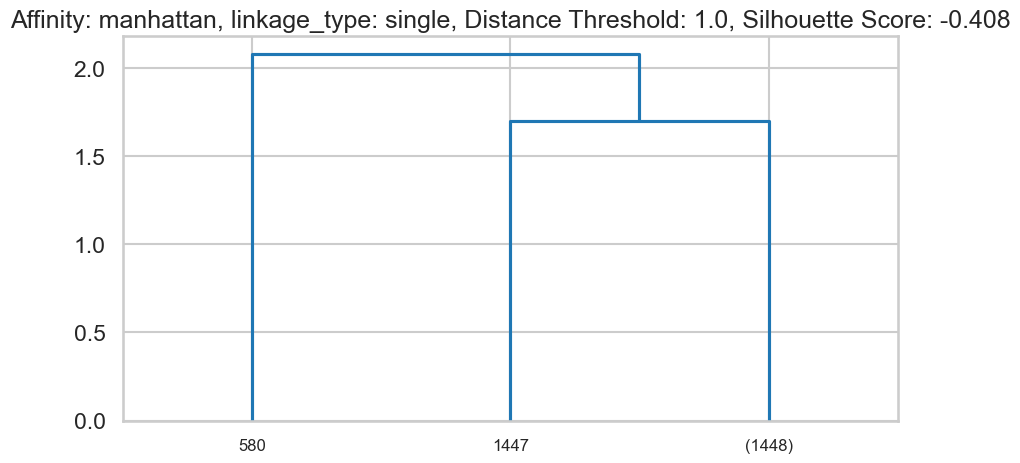

Affinity: manhattan, linkage_type: single, Distance Threshold: 1.0, Silhouette Score: -0.408
[ 1  1  1 ... 12  4  1]


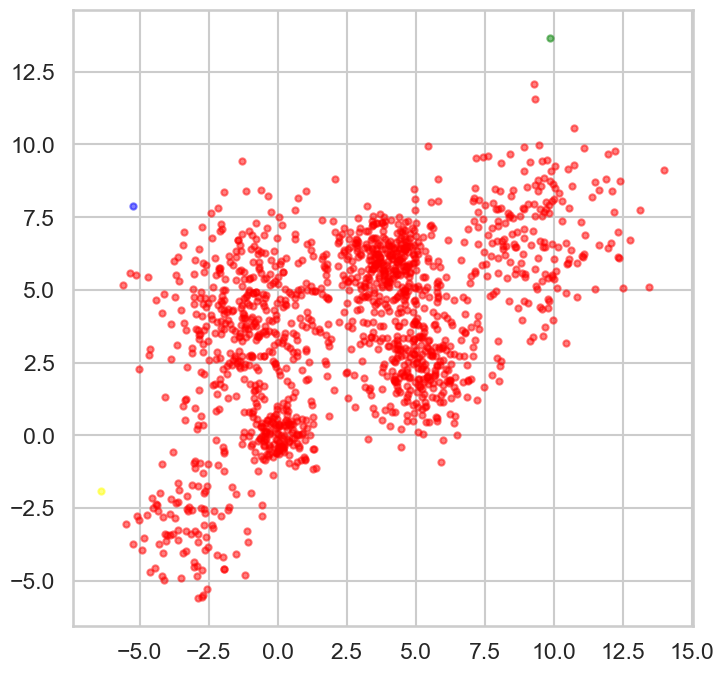

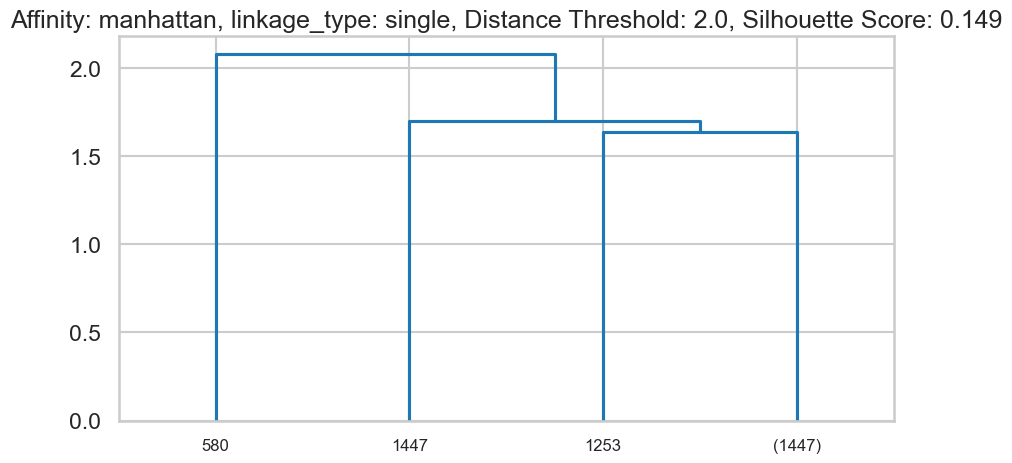

Affinity: manhattan, linkage_type: single, Distance Threshold: 2.0, Silhouette Score: 0.149
[0 0 0 ... 2 0 0]
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


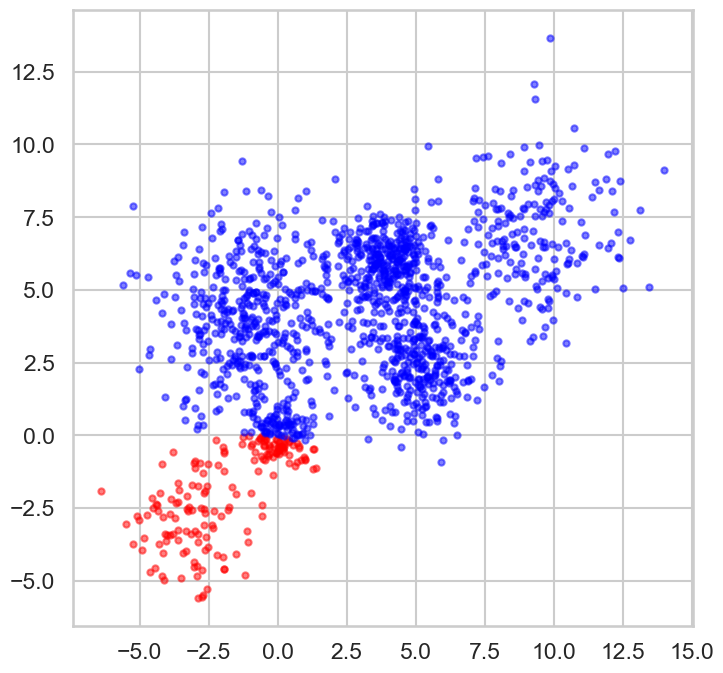

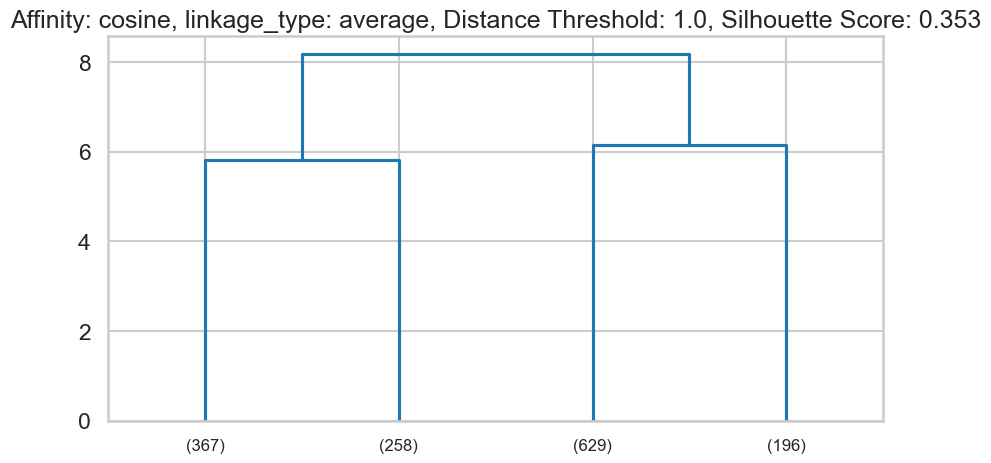

Affinity: cosine, linkage_type: average, Distance Threshold: 1.0, Silhouette Score: 0.353
[0 0 0 ... 1 1 1]
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
An error occurred: Number of labels is 1. Valid values are 2 to n_samples - 1 (inc

In [85]:
# Define parameters to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkage_types = ['average', 'single']
distance_thresholds = [1.0,2.0,3.0, 4.0,5.0,6.0]

# Store results
best_score = -1
best_params = None
all_scores = {}
        
# Try different parameters
for affinity in affinities:
    for linkage_type in linkage_types:
        for distance_threshold in distance_thresholds:
            try:
                # Perform hierarchical clustering
                X = agg_clus(df, affinity=affinity, linkage_type=linkage_type, distance_threshold=distance_threshold)


                # Compute silhouette score
                score = silhouette_score(df, X.labels_)

                # Store results
                params = (affinity, linkage_type, distance_threshold)
                all_scores[params] = score

                # Plot clusters
                display_cluster(df.to_numpy(copy=True), X, len(np.unique(X.labels_)) )            

                # Plot dendrogram
                fig, ax = plt.subplots(figsize=(10, 5))
                n = linkage(pd.DataFrame(Multi_blob_Data),method=linkage_type)
                dendrogram(n, truncate_mode='level', p=distance_threshold)
                plt.title(f'Affinity: {affinity}, linkage_type: {linkage_type}, Distance Threshold: {distance_threshold}, Silhouette Score: {score:.3f}')
                plt.show()

                # Print resulting clusters
                print(f'Affinity: {affinity}, linkage_type: {linkage_type}, Distance Threshold: {distance_threshold}, Silhouette Score: {score:.3f}')
                print(X.labels_)

                # Update best score
                if score > best_score:
                    best_score = score
                    best_params = params
            except Exception as e:
                print(f"An error occurred: {e}")
                continue

# Print best parameters and score
print(f'Best Parameters: {best_params}, Silhouette Score: {best_score:.3f}')

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 